In [1]:
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

NameError: name 'writing' is not defined

In [2]:

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)

    return text

In [3]:
text = pd.read_csv("result.csv")
corpus = text["text"]
corpus = corpus.astype('str')
corpus_clean = corpus.apply(nlp_pipeline)
corpus_clean.head()
length = corpus.size
print(length)

72975


In [8]:

xP = []
xM = []
polarityP = []
polarityM = []
xFreq = []
yFreqP = []
yFreqM = []
compteur = 0
for tweet in corpus_clean:
    xFreq.append(compteur)
    pol = TextBlob(tweet,pos_tagger=PatternTagger(),analyzer=PatternAnalyzer()).sentiment[0]
    if pol>0.5:
        xP.append(compteur)
        polarityP.append(pol)
        yFreqP.append(1)
        yFreqM.append(0)
    elif pol<-0.5:
        xM.append(compteur)
        polarityM.append(-pol)
        yFreqP.append(0)
        yFreqM.append(1)
    else:
        yFreqP.append(0)
        yFreqM.append(0)
    compteur+=1

<function matplotlib.pyplot.show>

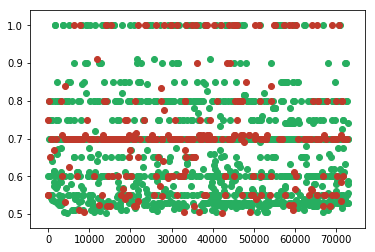

In [5]:


plt.scatter(xP,polarityP,color="#27ae60")
plt.scatter(xM,polarityM,color="#c0392b")
plt.show

In [6]:

group = lambda liste, size : [liste[i:i+size] for i in range(0, len(liste), size)]

polarity_par_paquet = group(polarity,length // 50)

liste_moyennes = []
liste_var = []
for l in polarity_par_paquet :
    liste_var.append(np.var(l))
    liste_moyennes.append(np.mean(l))

plt.plot(liste_moyennes)
plt.plot(liste_var)

NameError: name 'polarity' is not defined

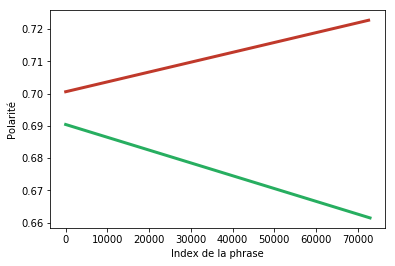

In [7]:
xP=(np.array(xP)).reshape(-1,1)
xM=(np.array(xM)).reshape(-1,1)
from sklearn.linear_model import LinearRegression
myregP = LinearRegression()
myregP = myregP.fit(xP,polarityP)
myregM = LinearRegression()
myregM = myregM.fit(xM,polarityM)
#regr = LinearRegression()
#regr.fit(X,polarity)
#pred = regr.predict(diabetes_X_test)
plt.plot(xP,myregP.predict(xP),"-r",color="#27ae60", linewidth=3)
plt.plot(xM,myregM.predict(xM),"-r",color="#c0392b", linewidth=3)
plt.xlabel("Index de la phrase")
plt.ylabel("Polarité")
plt.show()

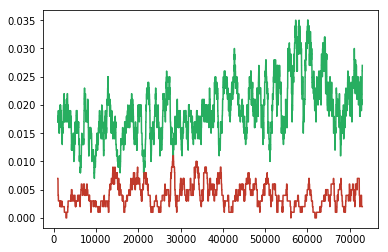

In [10]:
#Analyse en fréquence
#Moyenne glissante sur 1000 phrases
sumP = 0
sumM = 0
xFreqAvg = []
yFreqPAvg = []
yFreqMAvg = []
for i in range(1000):
    sumP += yFreqP[i]
    sumM += yFreqM[i]
xFreqAvg.append(999)
yFreqPAvg.append(sumP/1000)
yFreqMAvg.append(sumM/1000)
for i in range(1000,length):
    sumP -= yFreqP[i-1000]
    sumP += yFreqP[i]
    sumM -= yFreqM[i-1000]
    sumM += yFreqM[i]
    xFreqAvg.append(i)
    yFreqPAvg.append(sumP/1000)
    yFreqMAvg.append(sumM/1000)
plt.plot(xFreqAvg,yFreqPAvg,color="#27ae60")
plt.plot(xFreqAvg,yFreqMAvg,color="#c0392b")
plt.show()